# Project: Investigate TMDb Movies Data


## Table of Contents

- [A. Introduction](#intro)
 - [A.1 Overview](#overview)
 - [A.2 About the dataset](#about)
 - [A.3 Questions](#questions)
- [B. Importing required libraries and Loading Data](#import)
- [C. Data Wrangling](#wrangling)
    - [C.1 Assessing data](#assess)
        - [Assessment Summary](#assess-summary)
    - [C.2 Cleaning data](#cleaning)
        - [Storing cleaned data](#store)
- [D. Exploratory Data Analysis](#eda)
    - [1. Number of movies releases over years](#q1)
    - [2. Which genre has the most release of movies count?](#q2)
    - [3. Highest and lowest profit](#q3)
    - [4. Highest and lowest budget](#q4)
    - [5. Highest and lowest revenue](#q5)
    - [6. Budget, Revenue and Profit rates over years](#q6)
    - [7. Average runtime over years](#q7)
    - [8. Top month in number of released movies](#q8)
    - [9. Top month in average profit](#q9)
    - [10. Properties associated with movies that have high revenues](#q10)
- [E. Conclusions](#conclusions)
---

<a id='intro'></a>
## A. Introduction

<a id='overview'></a>
### A.1 Overview
In this project, I will analyze a dataset and then communicate my findings about it. I will use the Python libraries NumPy, pandas, and Matplotlib to make my analysis easier.

I will conduct my own data analysis and create a file to share that documents your findings. I will start by taking a look at your dataset and brainstorming what questions I could answer using it. Then I will use pandas and NumPy to answer the questions I am most interested in, and create a report sharing the answers.

<a id='about'></a>
### A.2 About the dataset:
<u>TMDb movies data</u>: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

**Download**: [TMDb movie data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)
(cleaned from original data on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)).

<a id='questions'></a>
### A.3 Questions in mind:
- [1. Number of movies releases over years](#q1)
- [2. Which genre has the most release of movies count?](#q2)
- [3. Highest and lowest profit](#q3)
- [4. Highest and lowest budget](#q4)
- [5. Highest and lowest revenue](#q5)
- [6. Budget, Revenue and Profit rates over years](#q6)
- [7. Average runtime over years](#q7)
- [8. Top month in number of released movies](#q8)
- [9. Top month in average profit](#q9)
- [10.Properties associated with movies that have high revenues](#q10)


---
***But first let's make sure our data is clean and ready to asnwer our questions.***

<a id='import'></a>
## B. Importing required libraries and Loading Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading data
df = pd.read_csv('Data/tmdb-movies.csv')

<a id='wrangling'></a>
## C. Data Wrangling
We will assess and clean our data to make sure it gives us right and realistic answers.

**First let's briefly explore our data**

<a id='assess'></a>
### C.1 Assessing data:

In [3]:
# Exploring the columns
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [4]:
# set display all columns
pd.set_option('display.max_columns', 21)

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# checking missing values and dtypes
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

- **Looks like we have missing values in many columns, I think most of them will not affect our anaylsis.**
- **Erroneous datatype:**
    - `id`: should be a string.
    - `release_date`: should be a datatime.

In [8]:
# Checking duplicated values
df.duplicated().sum()

1

In [9]:
df[df.id.duplicated()][['id','original_title']]

,id,original_title
2090,42194,TEKKEN


In [10]:
df.query('original_title == "TEKKEN"')[['id', 'imdb_id', 'original_title', 'release_date']]

,id,imdb_id,original_title,release_date
2089,42194,tt0411951,TEKKEN,3/20/10
2090,42194,tt0411951,TEKKEN,3/20/10


In [11]:

df.id.duplicated().sum()

1

- **Duplucated movie entries**, *Looks like someone loves TEKKEN movie much*

In [12]:
df.original_title.duplicated().sum()

295

In [13]:
df[df.original_title.duplicated()][['id','original_title']]

,id,original_title
1133,281778,Survivor
1194,296626,Finders Keepers
1349,42222,Julia
1440,7445,Brothers
1513,62320,Home
...,...,...
10818,39995,Long Weekend
10827,2661,Batman
10849,28270,Gambit
10853,15598,Alfie


In [14]:
df.query('original_title == "Batman"')[['id', 'imdb_id', 'original_title', 'release_date']]

,id,imdb_id,original_title,release_date
9182,268,tt0096895,Batman,6/23/89
10827,2661,tt0060153,Batman,7/30/66


In [15]:
df.query('original_title == "Julia"')[['id', 'imdb_id', 'original_title', 'release_date']]

,id,imdb_id,original_title,release_date
1156,278632,tt2582426,Julia,10/14/14
1349,42222,tt0076245,Julia,10/2/77
3272,7351,tt0903627,Julia,2/9/08


In [16]:
df.query('original_title == "The Chase"')[['id', 'imdb_id', 'original_title', 'release_date']]

,id,imdb_id,original_title,release_date
4245,10694,tt0109402,The Chase,3/4/94
10854,31602,tt0060232,The Chase,2/17/66


- **Does not seem a duplication to me, Just the same movie's name.**

In [17]:
# make sure all movies have a name
df.original_title.isnull().sum()

0

**Lets check runtime column**

In [18]:
df.runtime.describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [19]:
df.query('runtime == 900').head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


In [20]:
df.query('runtime == 0').head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,tattoo|tattooing,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,NaN,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.0,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.0,0.0


In [21]:
df.runtime.sort_values().unique()

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  36,  38,  40,  41,  42,
        43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [22]:
df.query('runtime != 0 and runtime < 30')[['original_title', 'runtime']].sort_values('runtime')

,original_title,runtime
10754,Bambi Meets Godzilla,2
10550,Luxo Jr.,2
7905,The Adventures of AndrÃ© and Wally B.,2
4883,Fresh Guacamole,2
4890,Cousin Ben Troop Screening,2
...,...,...
1656,The Gruffalo,27
7168,Six Shooter,27
7518,Shrek the Halls,28
9920,Scorpio Rising,28


In [23]:
df.runtime.nlargest(20)

3894    900
4041    877
2722    705
6176    566
6181    561
6894    550
2214    540
3356    501
1865    500
3141    470
2170    421
8766    417
2843    400
6008    400
4788    389
9300    372
4198    366
4939    360
7256    360
5121    352
Name: runtime, dtype: int64

- **Incorrect, missing and outlires runtime records**

**Checking budget and revenue data**

In [24]:
# budget and revenue data
df[['budget', 'revenue', 'budget_adj', 'revenue_adj']].describe()

,budget,revenue,budget_adj,revenue_adj
count,1.086600e+04,1.086600e+04,1.086600e+04,1.086600e+04
mean,1.462570e+07,3.982332e+07,1.755104e+07,5.136436e+07
std,3.091321e+07,1.170035e+08,3.430616e+07,1.446325e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.400000e+07,2.085325e+07,3.369710e+07
max,4.250000e+08,2.781506e+09,4.250000e+08,2.827124e+09


In [25]:
df.query('budget == 0')[['original_title', 'budget', 'revenue', 'budget_adj', 'revenue_adj']]

,original_title,budget,revenue,budget_adj,revenue_adj
30,Mr. Holmes,0,29355203,0.0,2.700677e+07
36,Solace,0,22354572,0.0,2.056620e+07
72,Beyond the Reach,0,45895,0.0,4.222338e+04
74,Mythica: The Darkspore,0,0,0.0,0.000000e+00
75,Me and Earl and the Dying Girl,0,0,0.0,0.000000e+00
...,...,...,...,...,...
10860,Carry On Screaming!,0,0,0.0,0.000000e+00
10861,The Endless Summer,0,0,0.0,0.000000e+00
10862,Grand Prix,0,0,0.0,0.000000e+00
10863,Beregis Avtomobilya,0,0,0.0,0.000000e+00


In [26]:
df.query('revenue == 0')[['original_title', 'budget', 'revenue', 'budget_adj', 'revenue_adj']]

,original_title,budget,revenue,budget_adj,revenue_adj
48,Wild Card,30000000,0,2.759999e+07,0.0
67,Survivor,20000000,0,1.839999e+07,0.0
74,Mythica: The Darkspore,0,0,0.000000e+00,0.0
75,Me and Earl and the Dying Girl,0,0,0.000000e+00,0.0
92,Mythica: The Necromancer,0,0,0.000000e+00,0.0
...,...,...,...,...,...
10861,The Endless Summer,0,0,0.000000e+00,0.0
10862,Grand Prix,0,0,0.000000e+00,0.0
10863,Beregis Avtomobilya,0,0,0.000000e+00,0.0
10864,"What's Up, Tiger Lily?",0,0,0.000000e+00,0.0


- **A lot of movies have no budget or revenue data (Zoro USD).**
- **In budget and revenue analysis, We will create a copy and drop all the zeros.**

- **Also, We will drop the non useful columns to us.** i.e. `imdb_id`, `homepage`, `cast`, `director`, `tagline`, `keywords`, `overview`, `production_companies`, `budget_adj`, `revenue_adj`
---

<a id='assess-summary'></a>
### Assessment summary

- Erroneous datatype.
    - `id`: should be a string.
    - `release_date`: should be a datatime.
- Duplicated movies entires.
- Drop non useful columns.
- Rows with missing values. *drop if needed*
- Runtime incorrect values.
- Missing (zero) budget and revenue records.
---

<a id='cleaning'></a>
### C.2 Cleaning data
**It is a good practice to work on copies in cleaning stage.**<br>
So, let's make a copy of our dataframe to work on.

In [27]:
# create a copy
df_clean = df.copy()

**1. Fixing datatypes**

**Define**
- Fix datatypes using `.astype()` and `.to_datetime()` functions.

**Code**

In [28]:
df_clean.id = df_clean.id.astype(object)

In [29]:
df_clean.release_date = pd.to_datetime(df_clean.release_date)

**Test**

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  object        
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [31]:
df_clean[['id','original_title', 'release_date', 'release_year']].sample(5)

,id,original_title,release_date,release_year
3731,63139,All Things Fall Apart,2011-03-05,2011
5418,27318,Jack Frost,1997-11-18,1997
4883,142563,Fresh Guacamole,2012-03-02,2012
2165,45756,Sint,2010-10-31,2010
9450,2280,Big,1988-06-03,1988


**2. Duplicated movies' entires**

**Define**
- drop duplicated movies using `.drop_duplicates()`


**Code**

In [32]:
df_clean.shape

(10866, 21)

In [33]:
df_clean.drop_duplicates(inplace=True)

In [34]:
df_clean.shape

(10865, 21)

**Test**

In [35]:
df_clean.duplicated().sum()

0

**3. Drop non useful columns**

**Define**
The columns we will drop: `imdb_id`, `homepage`, `cast`, `director`, `tagline`, `keywords`, `overview`, `production_companies`, `budget_adj`, `revenue_adj`

**Code**

In [36]:
df_clean.drop(columns=['imdb_id', 'homepage', 'cast', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], inplace=True)

**Test**

In [37]:
df_clean.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


**4. Incorrect runtime records**

**Define**
- Remove all runtime records that are bellow `30` min.
- Remove the outlires

**Code**

In [38]:
# Below 30 min runtime values
df_clean.drop(index=df.query('runtime < 30').index, inplace=True)

In [39]:
# Outlires
df_clean.drop(index=df.query('runtime > 200').index, inplace=True)

**Test**

In [40]:
df.runtime.describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

**5. Incorrect budget and revenue records** 

**Define:**
- Let's first create a new copy from `df_clean` and drop the "zero" records, and then create a `profit` column.

**Code**

In [41]:
# copy
df_clean_1 = df_clean.copy()

In [42]:
df_clean_1.drop(index=df_clean_1.query('budget == 0 or revenue == 0').index, inplace=True)

**Test**

In [43]:
df_clean_1.query('budget == 0 or revenue == 0')[['budget', 'revenue']].sum()

budget     0
revenue    0
dtype: int64

In [44]:
df_clean_1.shape

(3844, 11)

**We have lost a lot of movies, let's generate descriptive statistics for `budget` and `revenue`.**

In [45]:
df_clean_1[['budget', 'revenue']].describe()

,budget,revenue
count,3.844000e+03,3.844000e+03
mean,3.722153e+07,1.076166e+08
std,4.223871e+07,1.759653e+08
min,1.000000e+00,2.000000e+00
25%,1.000000e+07,1.365803e+07
50%,2.400000e+07,4.483448e+07
75%,5.000000e+07,1.243780e+08
max,4.250000e+08,2.781506e+09


**More Cleaning**<br>
**Lets check the that 1.00 Dollar movies of budget.** 

In [46]:
df_clean_1.sort_values(['budget']).head(10)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
2618,39964,0.090186,1,100,Lost & Found,95,Comedy|Romance,1999-04-23,14,4.8,1999
3581,59296,0.520430,1,1378,"Love, Wedding, Marriage",90,Comedy|Romance,2011-06-03,55,5.3,2011
8944,14373,0.464188,2,16,Death Wish 2,88,Action|Crime|Thriller,1982-02-20,27,5.6,1982
10050,20701,0.317091,3,16,Tales from the Darkside: The Movie,93,Fantasy|Horror|Comedy,1990-05-03,37,5.8,1990
2398,39356,0.028456,3,43,Boy,87,Drama|Comedy,2010-02-14,26,7.3,2010
8235,25066,0.105894,6,11,Tales from the Hood,98,Horror|Thriller,1995-05-24,13,5.1,1995
10297,9644,0.490013,8,27,National Lampoon's Loaded Weapon 1,84,Comedy,1993-02-04,72,5.5,1993
8125,11980,0.705828,8,16,The Prophecy,98,Fantasy|Horror|Thriller,1995-09-01,54,5.5,1995
5852,217708,0.222776,10,11,Hross Ã­ oss,85,Drama|Romance|Comedy,2013-08-30,11,6.5,2013
10777,28932,0.439210,11,11,F.I.S.T.,145,Drama|Action,1978-04-26,13,6.7,1978


In [47]:
df_clean_1.sort_values(['revenue']).head(10)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
8142,2293,0.552091,6000000,2,Mallrats,94,Romance|Comedy,1995-10-20,201,6.8,1995
5067,13537,0.462609,6000000,2,Shattered Glass,94,Drama|History,2003-11-14,46,6.4,2003
3239,14301,0.352054,200000,3,Dr. Horrible's Sing-Along Blog,42,Adventure|Action|Comedy|Science Fiction|Music,2008-07-15,140,7.7,2008
8523,9431,0.578849,15000000,5,Bordello of Blood,87,Horror|Comedy,1996-08-16,27,4.9,1996
8226,48781,0.183034,6400000,6,Never Talk to Strangers,86,Thriller|Romance,1995-10-20,15,4.5,1995
10307,2259,0.450208,25000000,6,The House of the Spirits,140,Romance|Drama,1993-10-19,52,6.7,1993
8235,25066,0.105894,6,11,Tales from the Hood,98,Horror|Thriller,1995-05-24,13,5.1,1995
5852,217708,0.222776,10,11,Hross Ã­ oss,85,Drama|Romance|Comedy,2013-08-30,11,6.5,2013
10777,28932,0.439210,11,11,F.I.S.T.,145,Drama|Action,1978-04-26,13,6.7,1978
7158,14844,0.420568,23000000,12,Chasing Liberty,111,Comedy|Romance,2004-01-09,86,6.2,2004


**That is an incrorrect records.**
- **We will drop any row hava a `budget` or `revenue` bellow `1,000,000`.**

In [48]:
df_clean_1.drop(index=df_clean_1.query('budget <= 1e6 or revenue <= 1e6').index, inplace=True)

**Lets check the descriptive statistics agian.**

In [49]:
df_clean_1[['budget', 'revenue']].describe()

,budget,revenue
count,3.484000e+03,3.484000e+03
mean,4.049680e+07,1.180296e+08
std,4.293897e+07,1.815284e+08
min,1.100000e+06,1.007962e+06
25%,1.200000e+07,1.929873e+07
50%,2.500000e+07,5.459329e+07
75%,5.262500e+07,1.398716e+08
max,4.250000e+08,2.781506e+09


<a id='store'></a>
### Storing cleaned data

In [50]:
df_clean.to_csv('Data/tmdb_clean.csv', index=False)
df_clean_1.to_csv('Data/tmdb_expenses_clean.csv', index=False)

---

<a id='eda'></a>
## Exploratory Data Analysis
Let's try to answer our questions after cleaning the data.

<a id='q1'></a>
### 1. Number of movies releases over years

To answer this question, We need to group by `release_year` and count the total number of movies released in each year.

In [51]:
df_clean.groupby('release_year').count()['original_title'].sort_values(ascending=False).head()

release_year
2014    681
2013    634
2015    606
2012    566
2009    515
Name: original_title, dtype: int64

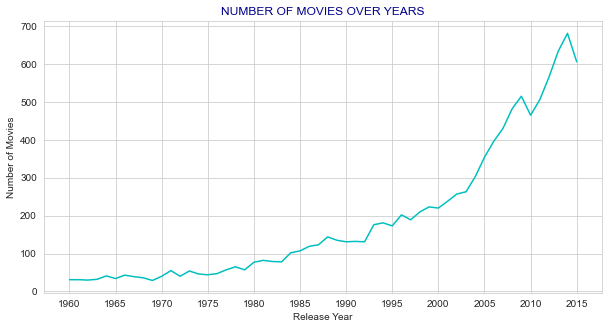

In [52]:
# set the sheet style and size
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# plotting
df_clean.groupby('release_year').count()['original_title'].plot(color='c')

# formatting
plt.xticks([x for x in range(1960, 2016, 5)])
plt.title("NUMBER OF MOVIES OVER YEARS",color='darkblue',fontsize = 12)
plt.xlabel('Release Year',fontsize = 10)
plt.ylabel('Number of Movies',fontsize = 10)

# save plot
plt.savefig('.\plots\movies_releases_years', dpi=300)

plt.show()

**Year 2014 has the highst number of released movies, followed by 2013 and 2015.**

<a id='q2'></a>
### 2. Which genre has the most release of movies count?
Let's first find all unique genres. 

In [53]:
# define a counter fuction

def count_a(column, df, sep='|'):
    """ 
    Returns the counts of unique values in a specific column in a DataFrame. 
    (This function may works only to this dataset)
    Parameters:
            column: a DataFrame column name
            df: a Pandas DataFrame
            sep: a separator character used to concatenate and split the rows data (default: sep='|')
            
    Returns:
            a Pandas Series with unique values count. 
    """
    try:
        # concatenating all the rows by 'sep ="|"'
        a_list = df[column].str.cat(sep = sep)
        # concatenating all the rows by 'sep ="|"'
        values = pd.Series(a_list.split(sep))
        
        # value counts
        return values.value_counts()

    except Exception as e:
        return e

In [54]:
# function test
print(f"Genres:\n{count_a('genres', df).head()}\n{60*'-'}")
print(f"Cast:\n{count_a('cast', df).head()}\n{60*'-'}")
print(f"Directors:\n{count_a('cast', df).head()}\n{60*'-'}")
print(f"Production companies:\n{count_a('production_companies', df).head()}\n{60*'-'}")

Genres:
Drama       4761
Comedy      3793
Thriller    2908
Action      2385
Romance     1712
dtype: int64
------------------------------------------------------------
Cast:
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64
------------------------------------------------------------
Directors:
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64
------------------------------------------------------------
Production companies:
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
dtype: int64
------------------------------------------------------------


In [55]:
count_a('genres', df_clean)

Drama              4688
Comedy             3708
Thriller           2891
Action             2338
Romance            1689
Horror             1615
Adventure          1432
Crime              1345
Science Fiction    1178
Family             1155
Fantasy             871
Mystery             803
Animation           559
Documentary         495
Music               391
History             314
War                 262
Foreign             184
Western             160
TV Movie            154
dtype: int64

[Resources: pandas.Series.str.cat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html)

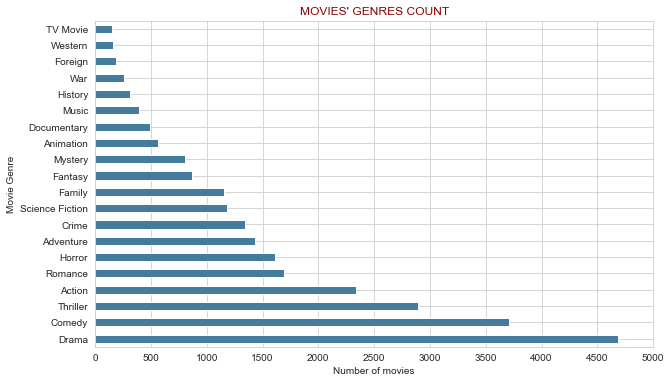

In [56]:
# set the sheet style and size
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# plotting
count_a('genres', df_clean).plot(kind='barh', color='#457b9d')

# formatting
plt.xticks([x for x in range(0, 5001, 500)])
plt.title("MOVIES' GENRES COUNT",color='darkred',fontsize = 12)
plt.xlabel('Number of movies',fontsize = 10)
plt.ylabel('Movie Genre',fontsize = 10)

# save plot
plt.savefig('.\plots\genres_count_hb', dpi=300)

plt.show()

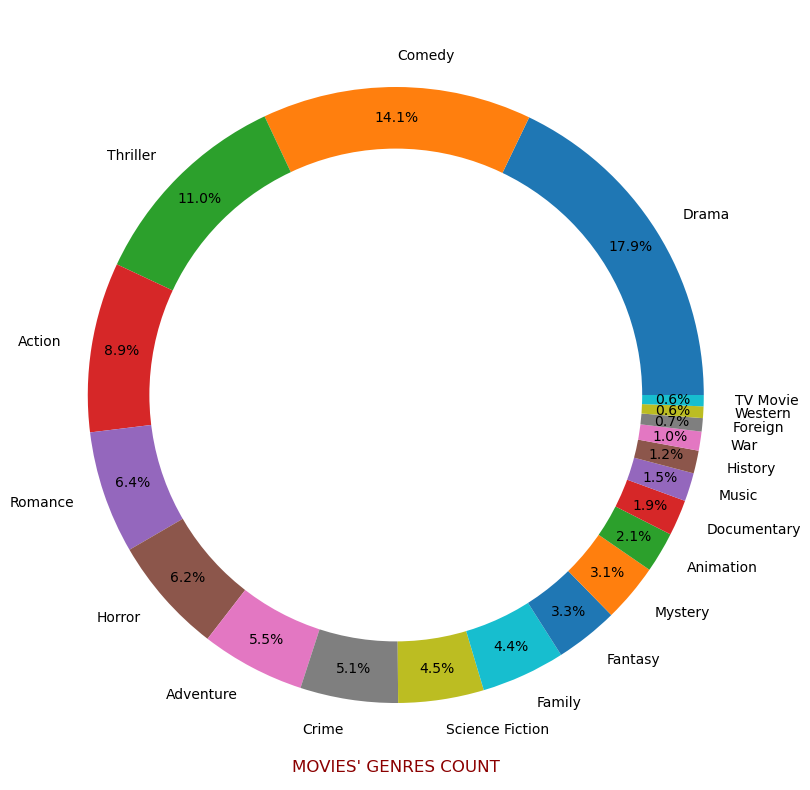

In [57]:
# set the sheet style and size
plt.style.use('default')
plt.figure(figsize=(10, 10))

# plotting
# main chart
count_a('genres',df_clean).plot(kind='pie', autopct='%.1f%%', pctdistance=.9)

# inner white circle
centre_circle = plt.Circle((0,0), .8, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# # formatting
plt.title("MOVIES' GENRES COUNT",color='darkred',fontsize = 12, y=-0)
plt.ylabel("")

# save plot
plt.savefig('.\plots\genres_count_pie', dpi=300)

plt.show()

**Drama genre has the highest number of movies over the years. That's why people likes drama much.**

<a id='q3'></a>
### 3. Highest and lowest profit

**Let's create a `profit` column**

In [58]:
df_clean_1['profit'] = df_clean_1.revenue - df_clean_1.budget
df_clean_1[['original_title','budget', 'revenue', 'profit']].head()

,original_title,budget,revenue,profit
0,Jurassic World,150000000,1513528810,1363528810
1,Mad Max: Fury Road,150000000,378436354,228436354
2,Insurgent,110000000,295238201,185238201
3,Star Wars: The Force Awakens,200000000,2068178225,1868178225
4,Furious 7,190000000,1506249360,1316249360


In [59]:
# define a fuction to return min and max value

def get_minmax(column, df, col_list:list=['original_title', 'budget', 'revenue', 'profit', 'release_year'], n:int=5, summary:bool=True):
    """ 
    Returns the maximum and minmum values from specific column in a DataFrame.
    (This function may works only to this dataset)
    Parameters:
            column: a DataFrame column name
            df: a Pandas DataFrame
            col_list: a list of the columns filter the DataFrame after sorting. (default: col_list = ['original_title', 'budget', 'revenue', 'profit', 'release_year']) 
            n: number of displayed results (default: n=5)
            summary: True if you want to print summary statments with the results. (default: summary=True)
    Returns:
            a Pandas DataFrame maximum and minmum values.
    """
    try:
        # high values
        high = df.sort_values(column, ascending=False)[col_list].head(n)
        high_df = pd.DataFrame(high)
        high_df['sort_type'] = 'highest'

        # low values
        low = df.sort_values(column, ascending=True)[col_list].head(n)
        low_df = pd.DataFrame(low)
        low_df['sort_type'] = 'lowest'
      
        # printing the results
        if summary:
            print(f"The highest {column.lower()} was {high_df.index[0]} movie.")
            print(f"The lowest {column.lower()} was {low_df.index[0]} movie.")
        else:
            pass
        
        return pd.concat([high_df, low_df]).groupby(['sort_type', 'original_title']).sum().sort_values(column, ascending=False)

    except Exception as e:
        return e

In [60]:
# top highest an lowest 5 movies
get_minmax('profit', df_clean_1)

The highest profit was 1386 movie.
The lowest profit was 2244 movie.


budget     revenue      profit  \
sort_type original_title                                                    
highest   Avatar                        237000000  2781505847  2544505847   
          Star Wars: The Force Awakens  200000000  2068178225  1868178225   
          Titanic                       200000000  1845034188  1645034188   
          Jurassic World                150000000  1513528810  1363528810   
          Furious 7                     190000000  1506249360  1316249360   
lowest    The 13th Warrior              160000000    61698899   -98301101   
          Mars Needs Moms               150000000    38992758  -111007242   
          The Alamo                     145000000    25819961  -119180039   
          The Lone Ranger               255000000    89289910  -165710090   
          The Warrior's Way             425000000    11087569  -413912431   

                                        release_year  
sort_type original_title                              
highest   Avatar                                2009  
          Star Wars: The Force Awakens          2015  
          Titanic                               1997  
          Jurassic World                        2015  
          Furious 7                             2015  
lowest    The 13th Warrior                      1999  
          Mars Needs Moms                       2011  
          The Alamo                             2004  
          The Lone Ranger                       2013  
          The Warrior's Way                     2010

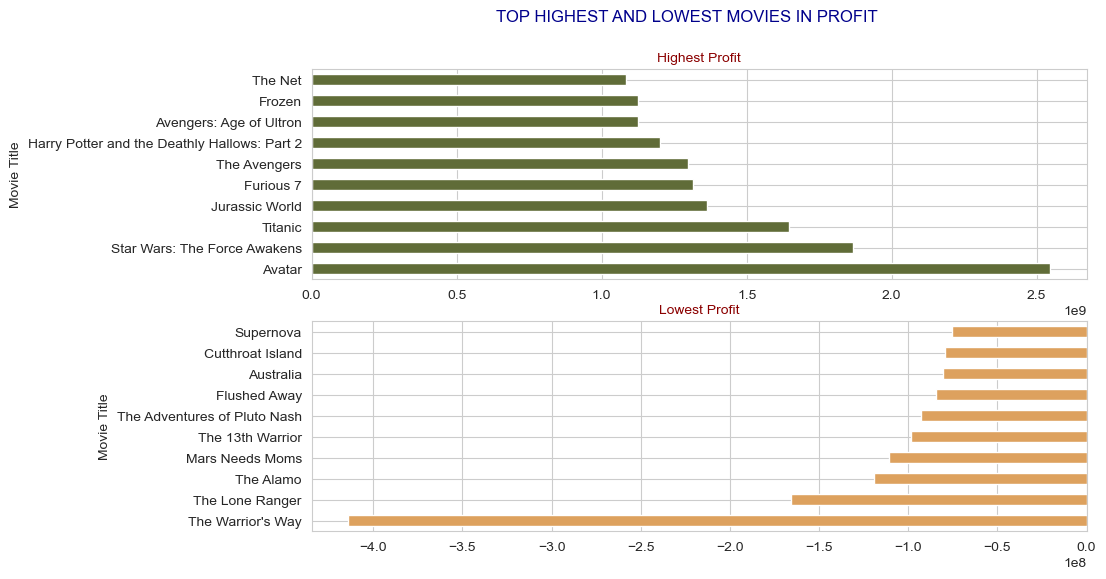

In [61]:
# set the sheet style and size
sns.set_style("whitegrid")

# make a subplot of shape 2*1
fig, axs = plt.subplots(2,1, figsize = (10, 6))

# plotting
# High
high_data = pd.DataFrame(df_clean_1.sort_values('profit', ascending=False)[['original_title', 'profit']].head(10))
high_data = high_data.set_index('original_title')
high_data.plot(kind='barh', ax = axs[0], color='#606c38')
# Low
low_data = pd.DataFrame(df_clean_1.sort_values('profit')[['original_title', 'profit']].head(10))
low_data = low_data.set_index('original_title')
low_data.plot(kind='barh', ax = axs[1], color='#dda15e')

# formatting
fig.suptitle("TOP HIGHEST AND LOWEST MOVIES IN PROFIT", color='darkblue',fontsize = 12)
axs[0].set_title('Highest Profit', color='darkred',fontsize = 10)
axs[1].set_title('Lowest Profit', color='darkred',fontsize = 10)
for ax in axs.flat:
    ax.set(ylabel='Movie Title')
    ax.legend_ = None

# save plot
plt.savefig('./plots/top_profit',bbox_inches='tight', dpi=300)

plt.show()

**Avatar (2009)** movie earned the highest profit by making over 2.5B.<br>
And **The Warrior's Way (2010)** movie made it to the last and lost more than 400M.

[Resources: Creating multiple subplots](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html)

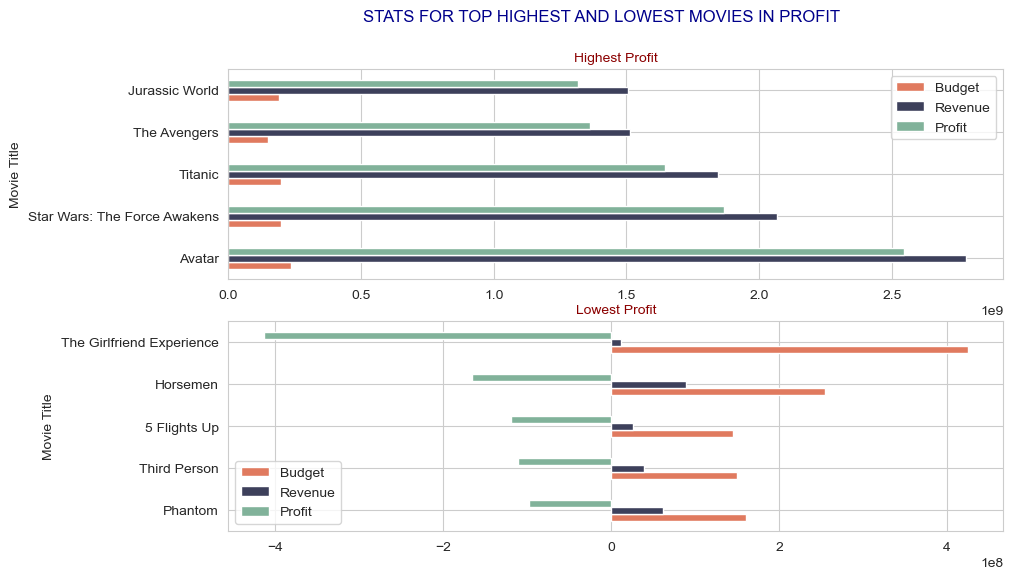

In [62]:
# Aother plot
# set the sheet style and size
sns.set_style("whitegrid")

# make a subplot of shape 2*1
fig, axs = plt.subplots(2,1, figsize = (10, 6))

# plotting
color = ["#e07a5f", "#3d405b", "#81b29a"]
get_minmax('profit', df_clean_1, summary=False)[['budget', 'revenue', 'profit']][:5].plot(kind='barh', ax=axs[0], color=color)
get_minmax('profit', df_clean_1, summary=False)[['budget', 'revenue', 'profit']][5:].plot(kind='barh', ax=axs[1], color=color)

# formatting
fig.suptitle("STATS FOR TOP HIGHEST AND LOWEST MOVIES IN PROFIT ", color='darkblue',fontsize = 12)
axs[0].set_title('Highest Profit', color='darkred',fontsize = 10)
axs[1].set_title('Lowest Profit', color='darkred',fontsize = 10)

for ax in axs.flat:
    ax.set_ylabel('Movie Title', fontsize='medium')
    ax.legend(['Budget','Revenue','Profit'])
    
yticklabels = []
for _ in range(len(get_minmax('revenue', df_clean_1, summary=False).index)):
    yticklabels.append(get_minmax('revenue', df_clean_1, summary=False).index[_][1])

axs[0].set(yticklabels=yticklabels[:5])
axs[1].set(yticklabels=yticklabels[5:])

# save plot
plt.savefig('./plots/top_profit_stats',bbox_inches='tight', dpi=300)

plt.show()

<a id='q4'></a>
### 4. Highest and lowest budget

In [63]:
# top highest an lowest 5 movies
get_minmax('budget', df_clean_1)

The highest budget was 2244 movie.
The lowest budget was 10566 movie.


budget     revenue  \
sort_type original_title                                                       
highest   The Warrior's Way                            425000000    11087569   
          Pirates of the Caribbean: On Stranger Tides  380000000  1021683000   
          Pirates of the Caribbean: At World's End     300000000   961000000   
          Avengers: Age of Ultron                      280000000  1405035767   
          Superman Returns                             270000000   391081192   
lowest    Night of the Demons                            1200000     3109904   
          Stop Making Sense                              1200000     4978922   
          Dr. No                                         1100000    59600000   
          Rocky                                          1100000   117235147   
          Troll                                          1100000     5450815   

                                                           profit  \
sort_type original_title                                            
highest   The Warrior's Way                            -413912431   
          Pirates of the Caribbean: On Stranger Tides   641683000   
          Pirates of the Caribbean: At World's End      661000000   
          Avengers: Age of Ultron                      1125035767   
          Superman Returns                              121081192   
lowest    Night of the Demons                             1909904   
          Stop Making Sense                               3778922   
          Dr. No                                         58500000   
          Rocky                                         116135147   
          Troll                                           4350815   

                                                       release_year  
sort_type original_title                                             
highest   The Warrior's Way                                    2010  
          Pirates of the Caribbean: On Stranger Tides          2011  
          Pirates of the Caribbean: At World's End             2007  
          Avengers: Age of Ultron                              2015  
          Superman Returns                                     2006  
lowest    Night of the Demons                                  1988  
          Stop Making Sense                                    1984  
          Dr. No                                               1962  
          Rocky                                                1976  
          Troll                                                1986

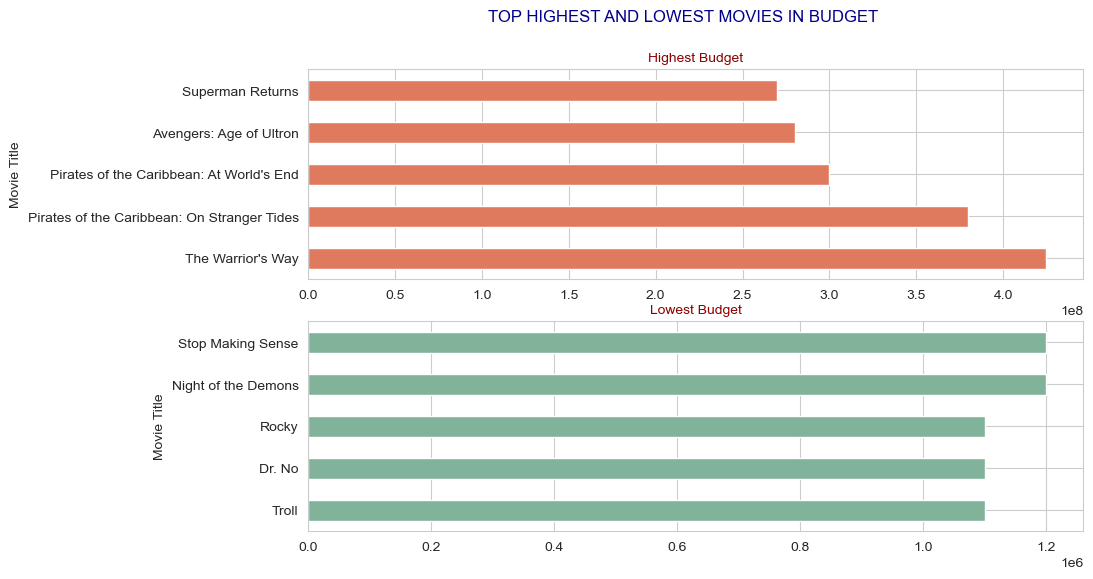

In [64]:
# set the sheet style and size
sns.set_style("whitegrid")

# make a subplot of shape 2*1
fig, axs = plt.subplots(2,1, figsize = (10, 6))

# plotting
# High
high_data = pd.DataFrame(df_clean_1.sort_values('budget', ascending=False)[['original_title', 'budget']].head(5))
high_data = high_data.set_index('original_title')
high_data.plot(kind='barh', ax = axs[0], color='#e07a5f')
# Low
low_data = pd.DataFrame(df_clean_1.sort_values('budget')[['original_title', 'budget']].head(5))
low_data = low_data.set_index('original_title')
low_data.plot(kind='barh', ax = axs[1], color='#81b29a')

# formatting
fig.suptitle("TOP HIGHEST AND LOWEST MOVIES IN BUDGET", color='darkblue',fontsize = 12)
axs[0].set_title('Highest Budget', color='darkred',fontsize = 10)
axs[1].set_title('Lowest Budget', color='darkred',fontsize = 10)
for ax in axs.flat:
    ax.set(ylabel='Movie Title')
    ax.legend_ = None

# save plot
plt.savefig('./plots/top_budget',bbox_inches='tight', dpi=300)

plt.show()

**The Warrior's Way** movie has spent the most.<br>
And **"Troll”**, **“Rocky”** and **“Dr. No”** movies have spent the least money.

<a id='q5'></a>
### 5. Highest and lowest revenue

In [65]:
# top highest an lowest 5 movies
get_minmax('revenue', df_clean_1)

The highest revenue was 1386 movie.
The lowest revenue was 1736 movie.


budget     revenue      profit  \
sort_type original_title                                                    
highest   Avatar                        237000000  2781505847  2544505847   
          Star Wars: The Force Awakens  200000000  2068178225  1868178225   
          Titanic                       200000000  1845034188  1645034188   
          The Avengers                  220000000  1519557910  1299557910   
          Jurassic World                150000000  1513528810  1363528810   
lowest    Phantom                        10000000     1034589    -8965411   
          Third Person                   28000000     1021398   -26978602   
          5 Flights Up                    6000000     1020921    -4979079   
          Horsemen                       20000000     1017401   -18982599   
          The Girlfriend Experience       1700000     1007962     -692038   

                                        release_year  
sort_type original_title                              
highest   Avatar                                2009  
          Star Wars: The Force Awakens          2015  
          Titanic                               1997  
          The Avengers                          2012  
          Jurassic World                        2015  
lowest    Phantom                               2013  
          Third Person                          2013  
          5 Flights Up                          2014  
          Horsemen                              2009  
          The Girlfriend Experience             2009

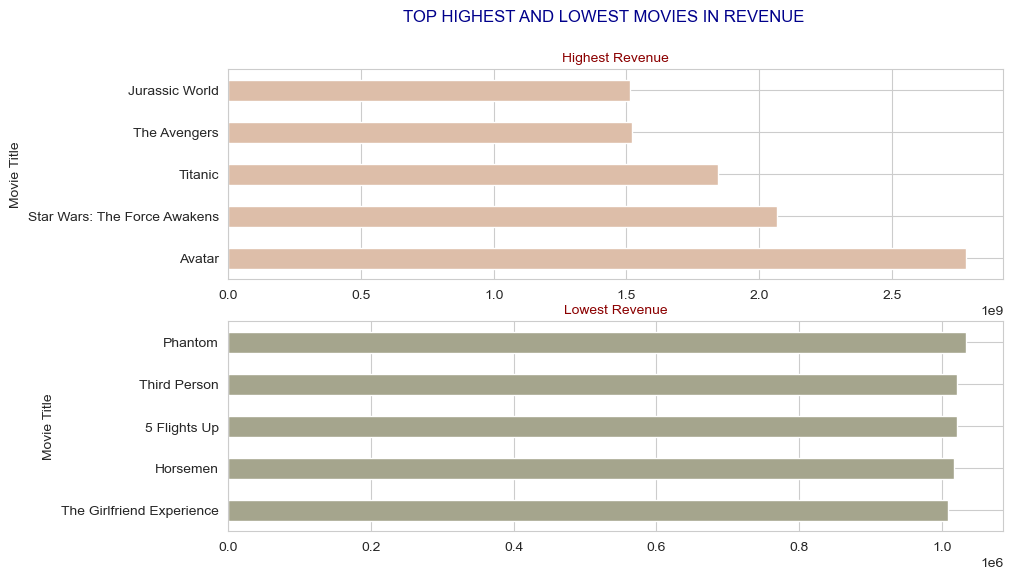

In [66]:
# set the sheet style and size
sns.set_style("whitegrid")

# make a subplot of shape 2*1
fig, axs = plt.subplots(2,1, figsize = (10, 6))

# plotting
# High
high_data = pd.DataFrame(df_clean_1.sort_values('revenue', ascending=False)[['original_title', 'revenue']].head(5))
high_data = high_data.set_index('original_title')
high_data.plot(kind='barh', ax = axs[0], color='#ddbea9')
# Low
low_data = pd.DataFrame(df_clean_1.sort_values('revenue')[['original_title', 'revenue']].head(5))
low_data = low_data.set_index('original_title')
low_data.plot(kind='barh', ax = axs[1], color='#a5a58d')

# formatting
fig.suptitle("TOP HIGHEST AND LOWEST MOVIES IN REVENUE", color='darkblue',fontsize = 12)

axs[0].set_title('Highest Revenue', color='darkred',fontsize = 10)
axs[1].set_title('Lowest Revenue', color='darkred',fontsize = 10)

for ax in axs.flat:
    ax.set_ylabel('Movie Title', fontsize='medium')
    ax.legend_ = None

# save plot
plt.savefig('./plots/top_revenue',bbox_inches='tight', dpi=300)

plt.show()

**Avatar** movie has earned the most.<br>
And **The Girlfriend Experience** movie has earned the least money.

<a id='q6'></a>
### 6. Budget, Revenue and Profit rates over years

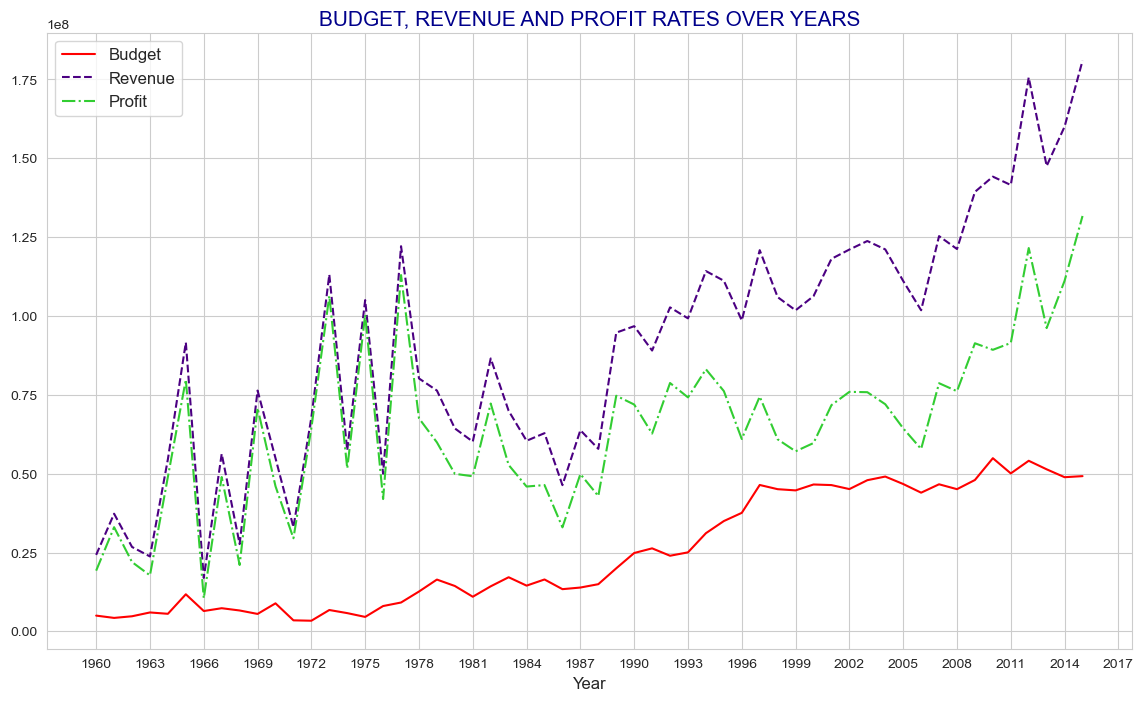

In [67]:
# set the sheet style and size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# plotting
df_clean_1.groupby('release_year')['budget'].mean().plot(label='Budget',color='r', style='-')
df_clean_1.groupby('release_year')['revenue'].mean().plot(label='Revenue',color='indigo', style='--')
df_clean_1.groupby('release_year')['profit'].mean().plot(label='Profit',color='limegreen', style='-.')

# formatting
plt.xticks([x for x in range(1960, 2016, 5)])
plt.title("BUDGET, REVENUE AND PROFIT RATES OVER YEARS",color='darkblue',fontsize = 15)
plt.xlabel('Year',fontsize = 12)
# plt.ylabel('Budget - Revenue - Profit ',fontsize = 12)
plt.xticks(np.arange(1960, 2020, 3))
plt.legend(fontsize='large')

# save plot
plt.savefig('.\plots\money_rates', dpi=300)

plt.show()

<a id='q7'></a>
### 7. Average runtime over years

In [68]:
# runtime descriptive statistics
df_clean.runtime.describe()

count    10561.000000
mean       102.617745
std         19.362564
min         30.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        200.000000
Name: runtime, dtype: float64

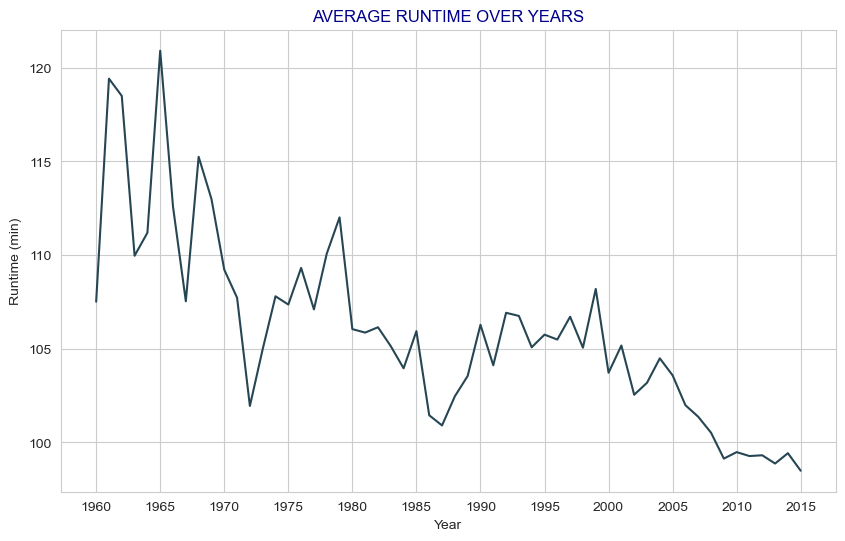

In [69]:
# set the sheet style and size
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# plotting
df_clean.groupby('release_year').mean()['runtime'].plot(color='#264653')

# formatting
plt.xticks([x for x in range(1960, 2020, 5)])

plt.title("AVERAGE RUNTIME OVER YEARS",color='darkblue',fontsize = 12)
plt.xlabel('Year',fontsize = 10)
plt.ylabel('Runtime (min)',fontsize = 10)

# save plot
plt.savefig('./plots/runtime_average', dpi=300)

plt.show()

**Looks like movies' duration is decreasing over years. People have no time for long movies, the average runtime of the movies is around 100 mins.**

<a id='q8'></a>
### 8. Top month in number of released movies

**Let's extract `month` column from `release_date`**

In [70]:
# create month column
df_clean['month'] = df_clean['release_date'].dt.month_name()
df_clean_1['month'] = df_clean['release_date'].dt.month_name()

In [71]:
# highest month
df_clean.month.value_counts()

September    1309
October      1120
December      935
August        908
January       874
June          806
March         798
May           791
April         788
July          784
November      773
February      675
Name: month, dtype: int64

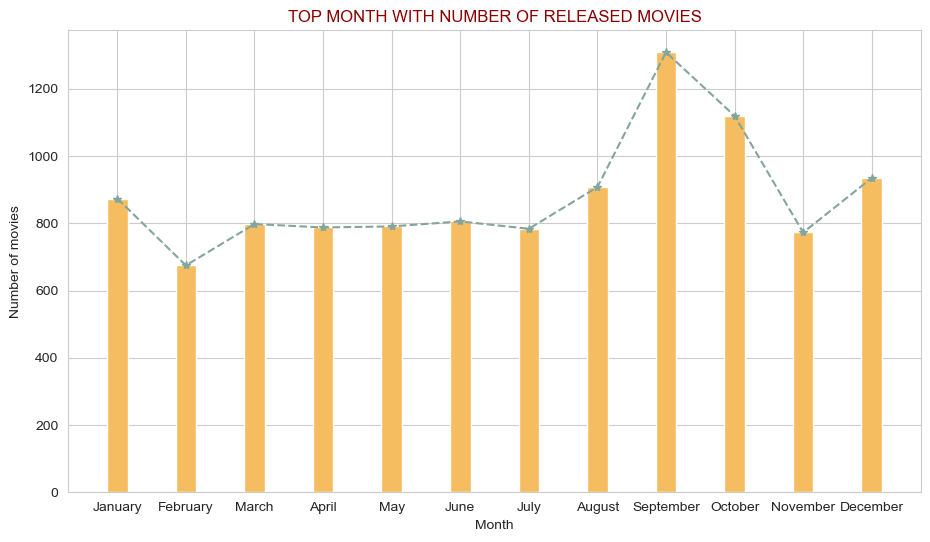

In [72]:
# set the sheet style and size
sns.set_style("whitegrid")
plt.figure(figsize=(11, 6))

# plotting
# reordering months
data = df_clean.month.value_counts()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data.index = pd.CategoricalIndex(data.index, categories=months, ordered=True)
data = data.sort_index()

# bar
plt.bar(months, data, width=.3, color='#f6bd60')
# line
data.plot(style='--', color='#84a59d', marker='*')

# formatting
plt.title("TOP MONTH WITH NUMBER OF RELEASED MOVIES",color='darkred',fontsize = 12)
plt.xlabel('Month',fontsize = 10)
plt.ylabel('Number of movies',fontsize = 10)

# save plot
plt.savefig('./plots/top-month-movies', dpi=300)

plt.show()

**September has the highest number of released movies, followed by October.**

[Resources: Pandas series sort by month index](https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index)

<a id='q9'></a>
### 9.   Top month in average profit

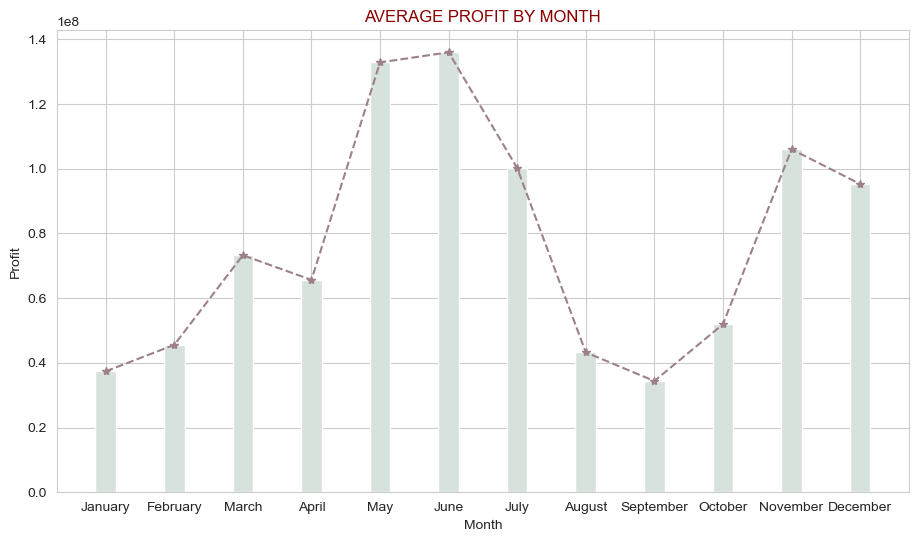

In [73]:
# which month made the highest average profit

# set the sheet style and size
sns.set_style("whitegrid")
plt.figure(figsize=(11, 6))

# plotting
# reordering months
data = df_clean_1.groupby('month')['profit'].mean()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data.index = pd.CategoricalIndex(data.index, categories=months, ordered=True)
data = data.sort_index()

# bar
plt.bar(months, data, width=.3, color='#d8e2dc')
# line
data.plot(style='--', color='#9d8189', marker='*')

# formatting
plt.title("AVERAGE PROFIT BY MONTH",color='darkred',fontsize = 12)
plt.xlabel('Month',fontsize = 10)
plt.ylabel('Profit',fontsize = 10)

# save plot
plt.savefig('./plots/top-month-profit', dpi=300)

plt.show()

**June and May have the highest average profit, And September and January have the lowest average profit**

<a id='q10'></a>
### 10. Properties  associated with movies that have high revenues

In [74]:
df_clean_1.sort_values('revenue', ascending=False)[['original_title','revenue','budget','runtime','popularity', 'vote_average']].head()


,original_title,revenue,budget,runtime,popularity,vote_average
1386,Avatar,2781505847,237000000,162,9.432768,7.1
3,Star Wars: The Force Awakens,2068178225,200000000,136,11.173104,7.5
5231,Titanic,1845034188,200000000,194,4.355219,7.3
4361,The Avengers,1519557910,220000000,143,7.637767,7.3
0,Jurassic World,1513528810,150000000,124,32.985763,6.5


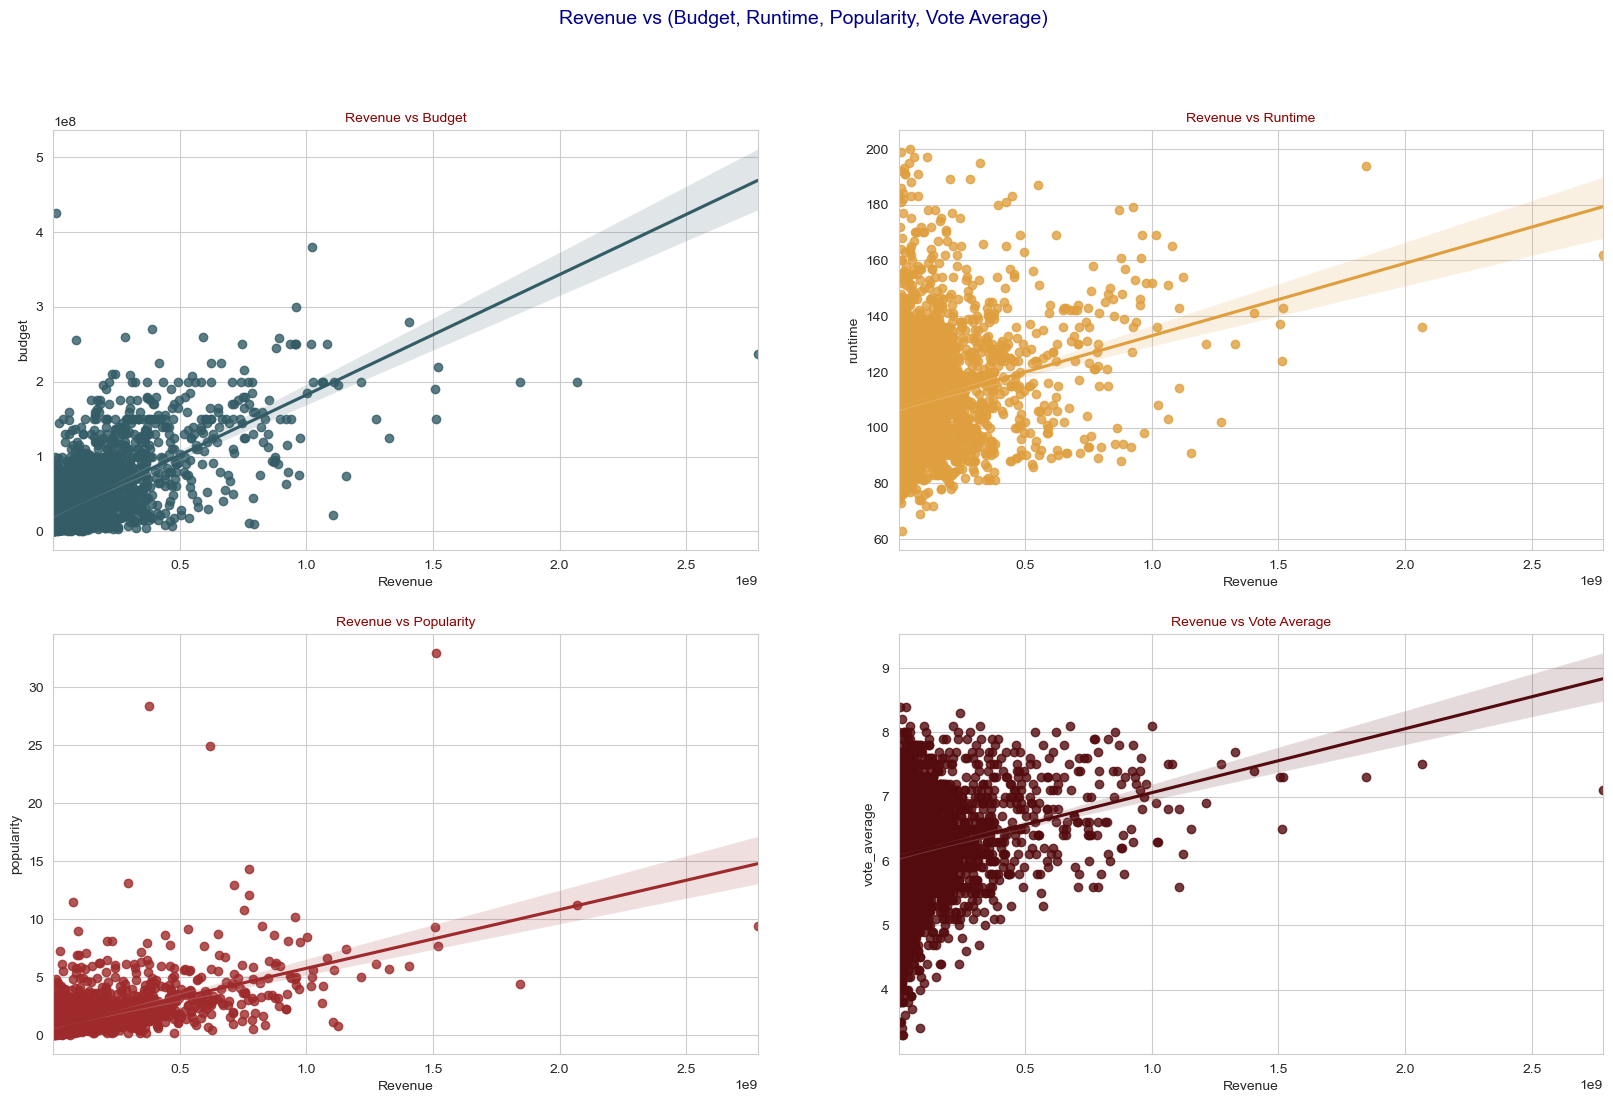

In [75]:
# set the sheet style and size
sns.set_style("whitegrid")

# make a subplot of shape 2*2
fig, axs = plt.subplots(2,2, figsize = (20, 12))

# plotting
data = df_clean_1.sort_values('revenue', ascending=False)[['original_title','revenue','budget','runtime','popularity', 'vote_average']]

sns.regplot(x=data.revenue, y=data.budget, color='#335c67', ax=axs[0][0])
sns.regplot(x=data.revenue, y=data.runtime, color='#e09f3e', ax=axs[0][1])
sns.regplot(x=data.revenue, y=data.popularity, color='#9e2a2b', ax=axs[1][0])
sns.regplot(x=data.revenue, y=data.vote_average, color='#540b0e', ax=axs[1][1])

# formatting
fig.suptitle("Revenue vs (Budget, Runtime, Popularity, Vote Average)",color='darkblue', fontsize = 14)

axs[0][0].set_title('Revenue vs Budget', color='darkred',fontsize = 10)
axs[0][1].set_title('Revenue vs Runtime', color='darkred',fontsize = 10)
axs[1][0].set_title('Revenue vs Popularity', color='darkred',fontsize = 10)
axs[1][1].set_title('Revenue vs Vote Average', color='darkred',fontsize = 10)

for ax in axs.flat:
    ax.set(xlabel='Revenue')

# save plot
plt.savefig('./plots/highest-revenue-prob', dpi=300)

plt.show()

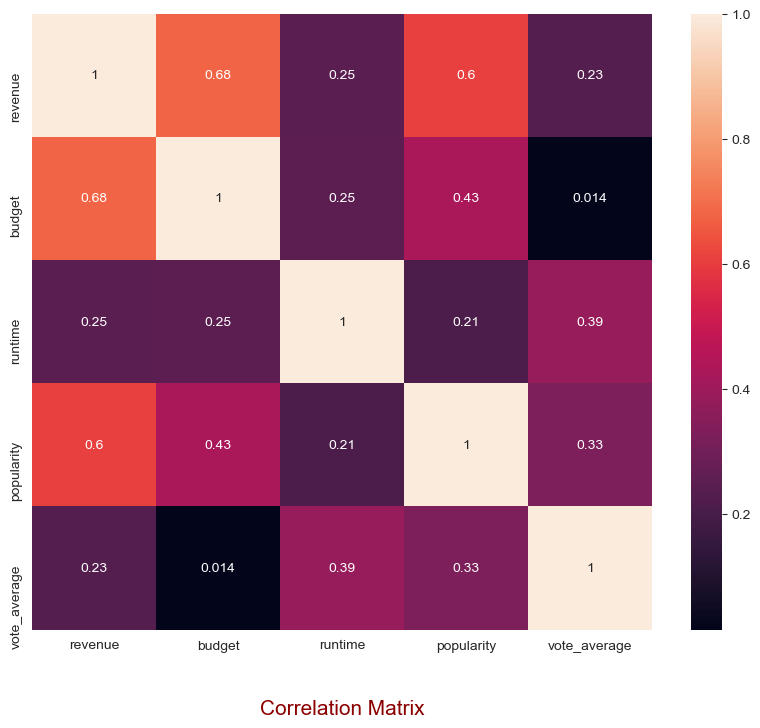

In [76]:
plt.figure(figsize=(10, 8))

# correlation matrix
sns.heatmap(data.corr(), annot=True)

# formatting
plt.title('Correlation Matrix', color='darkred', fontsize = 15, y=-.15)

# save plot
plt.savefig('./plots/highest-revenue-corr', dpi=300)

plt.show()

[Resourses: Seaborn Heatmaps](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)

**We have noticed the following:**

**A. Revenue vs Budget**: Looks like the revenue increases slightly at higher levels. There is a good possibility that movies with higher budgets result in better revenues.
<br>With **Correlation = 0.68**: There is a good relationship here. The revenues seem to increase with higher budget.


**B. Revenue vs Popularity**: The revenue seems to be increasing with popularity. So, If the movie's popularity is high, the revenue might be high as well.
<br>With **Correlation = 0.6**: Quite good relationship. The revenues seem to increase with higher popularity.

**C. Revenue vs Vote Average**:
With **Correlation = 0.23**: Vote average is somewhat relevant to the revenue.

**D. Revenue vs Runtime**:
With **Correlation = 0.25**:Runtime is not highly relevant to the revenue.

---

<a id='conclusions'></a>
## Conclusions

- According to these data, 2014 was the highest in terms of number of released movies.
- Drama genre is the frequent genre by number of released movies over the years, followed by Comedy, Thriller and Action.
- “Avatar” movie have earned the highest profit by making over 2.5B, and “The Warrior's Way” movie made it to the last and lost more than 400M.
- In terms of budget, “The Warrior's Way” movie has spent the most. And "Troll”, “Rocky” and “Dr. No” movies have spent the least money.
- In terms of revenue, “Avatar: movie has earned the most, and “The Girlfriend Experience“ movie has earned the  least money.
- Revenue is directly connected to the budget, as movies with higher budgets have shown a corresponding increase in the revenues and profits.
- Average runtime of the movies is decreasing over years.
- September has the highest number of released movies, followed by October. Also, June and May have the highest average profit, And September and January have the lowest average profit.


### Limitations:
- The analysis results are based on the data provided to us.
- It's not 100 percent guaranteed that this is gonna work, But it the analysis shows us that we have high probability of making high profits if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.
- There was no currency information regarding the movies. Different movies may have different currencies according to the country they are produce in and it may affect the results.Thus we assumed all currencies are in USD.
- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.


#### Questions in mide to check later:
- How is popularity trending over time?
- How are revenues trending over time?
- How is runtime trending over time?
- Do top ratings movies always generate big revenue?
- Do higher budget movies always generate big revenue?
- Is there any impact of vote count on revenue?
- Can we provide a list of the most popular directors based on ratings?
- Can we provide a list of directors that generates big revenue?
- What are typical runtimes for directors? Is there a duration preferred by directors?
- Is there a relation between popularity and revenue for directors? etc.

---

In [77]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
